In [198]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [199]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Dummy variable for Nan

In [204]:
# cabin_na = test_data['Cabin'].isna()
# dataset = [test_data['Cabin'].fillna(test_data['Cabin'].mean()), cabin_na]

In [6]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

# Name is bas feature

In [12]:
names_set_1 = set(train_data['Name'])

train_data.shape, len(names_set_1)

((8693, 14), 8474)

In [13]:
names_set_2 = set(test_data['Name'])
test_data.shape, len(names_set_2)

((4277, 13), 4177)

In [15]:
len(names_set_1.intersection(names_set_2))

21

# Other features

In [18]:
train_data.columns[1:-2]

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

# Numerical

In [ ]:
# Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck

In [21]:
len(set(train_data['Age'])), len(set(test_data['Age']))

(259, 170)

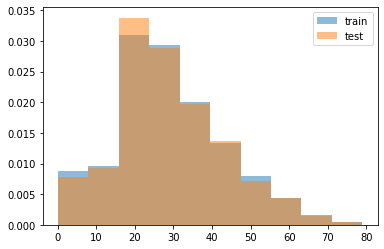

In [27]:
from matplotlib import pyplot as plt

plt.hist(train_data['Age'], density=1, alpha=0.5)
plt.hist(test_data['Age'], density=1, alpha=0.5)
plt.legend(['train', 'test'])

0.6415506729552514
0.6373626373626373


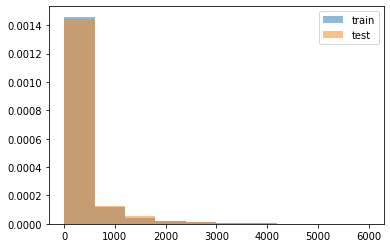

In [37]:
plt.hist(train_data['RoomService'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['RoomService'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['RoomService'] == 0).mean())
print((test_data['RoomService'] == 0).mean())

plt.legend(['train', 'test'])

0.6276314275854136
0.6289455225625439


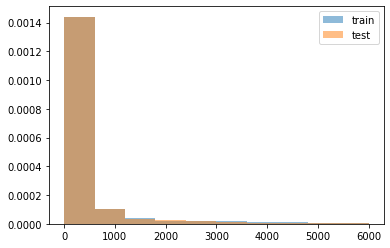

In [38]:
plt.hist(train_data['FoodCourt'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['FoodCourt'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['FoodCourt'] == 0).mean())
print((test_data['FoodCourt'] == 0).mean())

plt.legend(['train', 'test'])

0.6427010238122628
0.6415711947626841


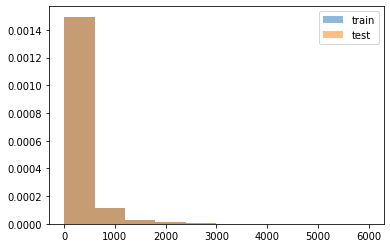

In [39]:
plt.hist(train_data['ShoppingMall'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['ShoppingMall'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['ShoppingMall'] == 0).mean())
print((test_data['ShoppingMall'] == 0).mean())

plt.legend(['train', 'test'])

0.6124467962728632
0.6104746317512275


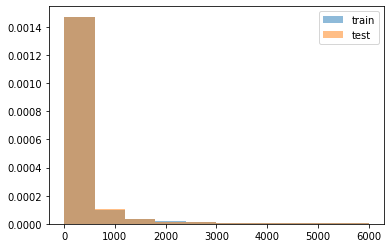

In [40]:
plt.hist(train_data['Spa'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['Spa'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['Spa'] == 0).mean())
print((test_data['Spa'] == 0).mean())

plt.legend(['train', 'test'])

0.632117795927758
0.6446107084404957


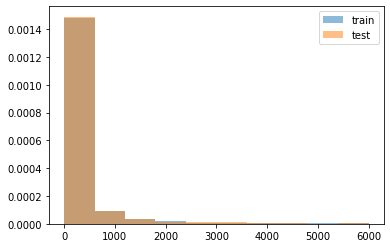

In [41]:
plt.hist(train_data['VRDeck'], density=1, alpha=0.5, range=(0, 6000))
plt.hist(test_data['VRDeck'], density=1, alpha=0.5, range=(0, 6000))

print((train_data['VRDeck'] == 0).mean())
print((test_data['VRDeck'] == 0).mean())

plt.legend(['train', 'test'])

# X numerical

In [224]:
num_cols = ['Age', "VIP", 'RoomService', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

x_num_train_num_na = train_data[num_cols].astype('float32').isna()
x_num_test_num_na = test_data[num_cols].astype('float32').isna()

x_num_train = train_data[num_cols].astype('float32').fillna(-1)
x_num_test = test_data[num_cols].astype('float32').fillna(-1)

In [57]:
x_num_train

,Age,VIP,RoomService,CryoSleep,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,0.0,109.0,0.0,9.0,25.0,549.0,44.0
2,58.0,1.0,43.0,0.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,0.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,0.0,303.0,0.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...
8688,41.0,1.0,0.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,0.0,0.0,1049.0,0.0,353.0,3235.0


In [211]:
# Dummy for numerical
# Я цце не використовую, бо nan тут немає
np.concatenate([x_num_train.fillna(0), x_num_train.isna()], axis=1)

array([[ 39.,   0.,   0., ...,   0.,   0.,   0.],
       [ 24.,   0., 109., ...,   0.,   0.,   0.],
       [ 58.,   1.,  43., ...,   0.,   0.,   0.],
       ...,
       [ 26.,   0.,   0., ...,   0.,   0.,   0.],
       [ 32.,   0.,   0., ...,   0.,   0.,   0.],
       [ 44.,   0., 126., ...,   0.,   0.,   0.]], dtype=float32)

# Bool

In [58]:
train_data['CryoSleep'].mean(), train_data['VIP'].mean()

(0.35830580462482303, 0.023439340400471142)

# Categorical features (factors)

In [185]:
import numpy as np
cat_columns = ['HomePlanet', 'Destination']

def ohe(x, w_i_map):
    encoding = np.zeros((len(x), len(words)))
    for k, w in enumerate(x):
        encoding[k, w_i_map[w]] += 1
    return encoding

In [186]:

x_train_cat = []
x_test_cat = []


for col in cat_columns:
    print(col)
    print('test-train difference', len(set(test_data[col]) - set(train_data[col])))
    print('train, test unique', len(set(test_data[col])), len(set(train_data[col])))
    
    words = set(train_data[col]).union(set(test_data[col]))

#     print(words)
    i_w_map = dict(enumerate(words))
    w_i_map = {v: k for k, v in i_w_map.items()}
#     print(i_w_map, w_i_map)

    col_f_train = ohe(train_data[col], w_i_map)
    col_f_test = ohe(test_data[col], w_i_map)
    print()
    
    x_train_cat.append(col_f_train)
    x_test_cat.append(col_f_test)

x_train_cat = np.concatenate(x_train_cat, axis=1)
x_test_cat = np.concatenate(x_test_cat, axis=1)

    
    # col_encoding_train = np.zeros((len(train_data), len(words)))
    # for w in 

HomePlanet
test-train difference 0
train, test unique 4 4

Destination
test-train difference 0
train, test unique 4 4



In [187]:
x_train_cat.shape

(8693, 8)

In [188]:
x_train_cat.shape, x_test_cat.shape

((8693, 8), (4277, 8))

# Text

In [100]:
a = set([len(i) for i in train_data['Cabin'].dropna().apply(lambda x: x.split('/'))])
a

{3}

In [102]:
sents_train = train_data['Cabin'].apply()
sents_test = test_data['Cabin'].apply(lambda x: x.split('/') if isinstance(x, str) else '0/0/0')

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
sents_train.head(4)

0    [B, 0, P]
1    [F, 0, S]
2    [A, 0, S]
3    [A, 0, S]
Name: Cabin, dtype: object

In [123]:
train_data['Cabin'][train_data['Cabin'].isna()] = '0/0/0'
test_data['Cabin'][test_data['Cabin'].isna()] = '0/0/0'

C:\Users\Wailt\AppData\Local\Temp\ipykernel_13036\691969671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Cabin'][train_data['Cabin'].isna()] = '0/0/0'
C:\Users\Wailt\AppData\Local\Temp\ipykernel_13036\691969671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Cabin'][test_data['Cabin'].isna()] = '0/0/0'


In [143]:
sents = train_data['Cabin'].tolist() + test_data['Cabin'].tolist()
counter = CountVectorizer(tokenizer=lambda x: x.split('/')).fit(sents)
counter.transform(['Hello world']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [170]:
len(counter.vocabulary_)

1904

In [176]:
train_text_bow = counter.transform(train_data['Cabin'].tolist()).toarray()
test_text_bow = counter.transform(test_data['Cabin'].tolist()).toarray()

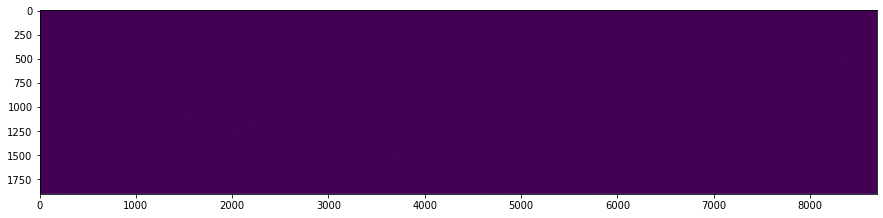

In [177]:
plt.figure(figsize=(15, 7))
plt.imshow(train_text_bow.T)

# Hashig trick

In [178]:
from sklearn.feature_extraction import FeatureHasher

hash_tr = []
hash_te = []

nan = '0/0/0'

for col in ['Cabin']:
    print(col)
    all_cat = train_data[col].fillna(nan).tolist() + test_data[col].fillna(nan).tolist()

    tr_cat_ = [{w: 1 for w in i.split('/')} for i in train_data[col].fillna(nan)]
    te_cat_ = [{w: 1 for w in i.split('/')} for i in test_data[col].fillna(nan)]

    fh = FeatureHasher(n_features=10).fit(tr_cat_ + te_cat_)

    hash_tr = (fh.transform(tr_cat_).toarray())
    hash_te = (fh.transform(te_cat_).toarray())

Cabin


In [179]:
hash_tr, hash_te

(array([[ 0., -1., -1., ...,  0.,  0., -1.],
        [ 0.,  0.,  0., ...,  0., -2., -1.],
        [ 0.,  0.,  1., ...,  0., -1., -1.],
        ...,
        [ 0.,  0., -1., ...,  0., -1.,  1.],
        [-1.,  0.,  0., ...,  1., -1.,  0.],
        [-1.,  0.,  0., ...,  1., -1.,  0.]]),
 array([[ 1.,  0.,  0., ...,  0., -1.,  1.],
        [ 0.,  0., -1., ...,  0., -2.,  0.],
        [ 0., -1.,  0., ...,  0., -1., -1.],
        ...,
        [ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0., -1.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0., -2.,  1.]]))

# train_data NAN

In [197]:
cabin_na = test_data['Cabin'].isna()
cabin_na.sum()

0

# all features

In [223]:
x_num_train.values.sum()

nan

In [3]:
# x_train = np.concatenate([x_num_train, x_num_train_num_na, x_train_cat, train_text_bow], axis=1)
# x_test = np.concatenate([x_num_test, x_num_test_num_na, x_test_cat, test_text_bow], axis=1)

x_train = np.concatenate([x_num_train, x_num_train_num_na, x_train_cat, hash_tr], axis=1)
x_test = np.concatenate([x_num_test, x_num_test_num_na, x_test_cat, hash_te], axis=1)

NameError: name 'np' is not defined

In [235]:
y_train = train_data['Transported']

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

metrics_model = []
all_models = []
for model_name, model in [('logistic(C=1)', LogisticRegression()), 
                         ('logistic(C=2)', LogisticRegression(C=2)),
                         ('GaussianNB', GaussianNB())
                         ]:
    metrics = []
    for i in range(5):
        x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=1, test_size=0.3)
        
        model.fit(x_tr, y_tr)
        
        y_tr_pred = model.predict(x_tr)
        metric = {}
        metric['train_f1'] = f1_score(y_tr, y_tr_pred)
        metric['train_precision'] = precision_score(y_tr, y_tr_pred)
        metric['train_recall'] = recall_score(y_tr, y_tr_pred)
        
        y_val_pred = model.predict(x_val)
        metric['test_f1'] = f1_score(y_val, y_val_pred)
        metric['test_precision'] = precision_score(y_val, y_val_pred)
        metric['test_recall'] = recall_score(y_val, y_val_pred)
        
        metrics.append(metric)
        
        all_models.append(model)
    
    model_avg = pd.DataFrame(metrics).mean()
    model_avg['model'] = model_name
    metrics_model.append(model_avg)

NameError: name 'x_train' is not defined

In [243]:
pd.DataFrame(metrics_model) # wo texts

,train_f1_train,train_precision,train_recall,test_f1_train,test_precision,test_recall,model
0,0.793779,0.773423,0.815251,0.789316,0.768176,0.811697,logistic(C=1)
1,0.787137,0.769894,0.805223,0.798030,0.785054,0.811776,logistic(C=2)


In [247]:
y_probas = []
for model in all_models:
    y_probas.append(model.predict_proba(x_test))

In [251]:
y_te = np.mean(y_probas, axis=0).argmax(axis=1)

In [258]:
submit = pd.DataFrame(np.array([test_data['PassengerId'], y_te == 1]).T, columns=['PassengerId', 'Transported'])

In [260]:
submit.to_csv('first.csv', index=False)